In [2]:
from jupyterthemes import jtplot
import numpy as np
jtplot.style()
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
%config InlineBackend.figure_format = 'retina' #high def charts
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [3]:
import pandas as pd # import pandas
#import University of Sheffield diet data
diet = "https://www.sheffield.ac.uk/polopoly_fs/1.570199!/file/stcp-Rdataset-Diet.csv"
data = pd.read_csv(diet)

In [4]:
data.head() # look at the first five instances in the data

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,,41,171,60,2,60.0
1,26,,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3


In [5]:
# Create a third column for 'weight.loss' - our variable of interest
data['Loss'] = data['pre.weight'] - data['weight6weeks']

In [6]:
data.head() # checxk to see if the transformation worked

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,Loss
0,25,,41,171,60,2,60.0,0.0
1,26,,32,174,103,2,103.0,0.0
2,1,0,22,159,58,1,54.2,3.8
3,2,0,46,192,60,1,54.0,6.0
4,3,0,55,170,64,1,63.3,0.7


In [7]:
data.describe() #summarry stats of the variables


,Person,Age,Height,pre.weight,Diet,weight6weeks,Loss
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,39.500000,39.153846,170.820513,72.525641,2.038462,68.680769,3.844872
std,22.660538,9.815277,11.276621,8.723344,0.812920,8.924504,2.551478
min,1.000000,16.000000,141.000000,58.000000,1.000000,53.000000,-2.100000
25%,20.250000,32.250000,164.250000,66.000000,1.000000,61.850000,2.000000
50%,39.500000,39.000000,169.500000,72.000000,2.000000,68.950000,3.600000
75%,58.750000,46.750000,174.750000,78.000000,3.000000,73.825000,5.550000
max,78.000000,60.000000,201.000000,103.000000,3.000000,103.000000,9.200000


In [8]:
print(data.dtypes) # list variable types 

Person            int64
gender           object
Age               int64
Height            int64
pre.weight        int64
Diet              int64
weight6weeks    float64
Loss            float64
dtype: object


In [9]:
data['Diet'] = pd.Categorical(data['Diet']) # Change Diet to a categorical variable

In [10]:
data.dtypes

Person             int64
gender            object
Age                int64
Height             int64
pre.weight         int64
Diet            category
weight6weeks     float64
Loss             float64
dtype: object

Text(0.5,0,'Diet')

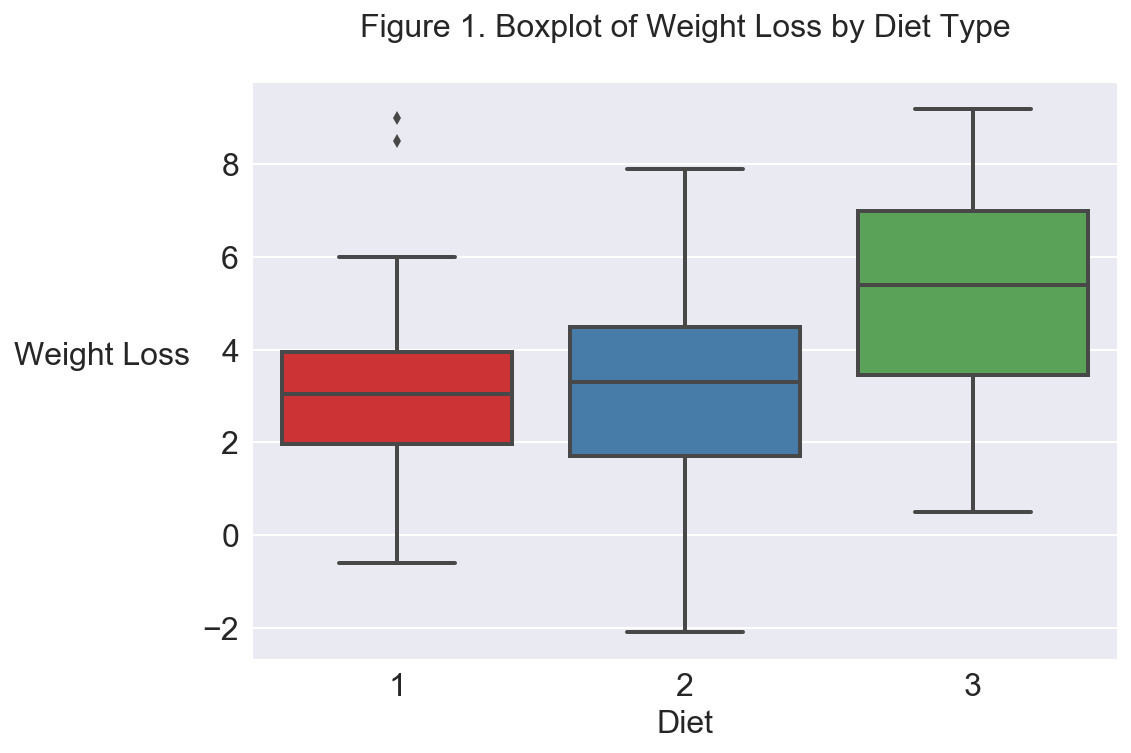

In [11]:
#create a weight.loss boxplot by diet type using seaborn

sns.set(font_scale=1.6) 
plt.subplots_adjust(left=3, right=4, top=4, bottom=3)
ax = sns.boxplot(x = "Diet", y = "Loss", data = data, 
                 palette="Set1", 
                 linewidth = 2)
ax.set_title("Figure 1. Boxplot of Weight Loss by Diet Type\n", fontsize=16)
ax.set_ylabel("Weight Loss", rotation = 0, fontsize=16, labelpad=50)
ax.set_xlabel("Diet", rotation = 0, fontsize=16)


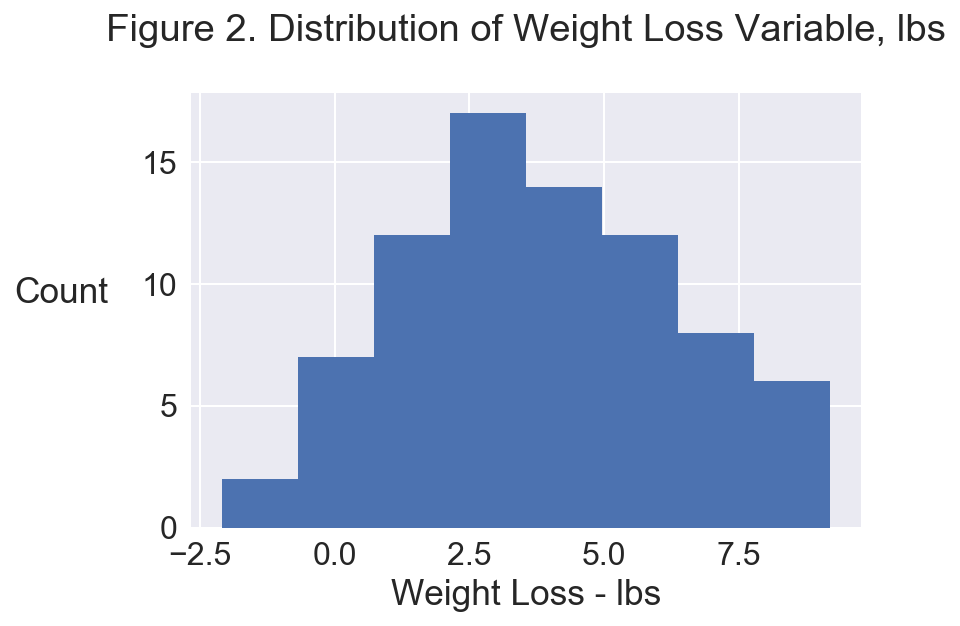

In [12]:
hist1 = plt.hist(data['Loss'], bins='auto') # check for variable normality in weight loss dependent variable. 
#Data looks normally distributed.
plt.title("Figure 2. Distribution of Weight Loss Variable, lbs\n")
plt.xlabel("Weight Loss - lbs")
plt.ylabel("Count", rotation = 0, labelpad = 40)
plt.show()

In [13]:
stats.normaltest(data['Loss'], axis=0) # statistical normality test to check the visual test. 
# P > 0.05 therefore We cannot reject the hypothesis that the sample comes from a population which has a normal distribution

NormaltestResult(statistic=0.8256032683724894, pvalue=0.6617935470237468)

LeveneResult(statistic=0.0, pvalue=1.0)


In [14]:
from statsmodels.formula.api import ols
model = ols("Loss ~ Diet", data).fit()

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Loss   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     6.197
Date:                Mon, 28 May 2018   Prob (F-statistic):            0.00323
Time:                        15:43:39   Log-Likelihood:                -177.27
No. Observations:                  78   AIC:                             360.5
Df Residuals:                      75   BIC:                             367.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3000      0.489      6.750      0.0

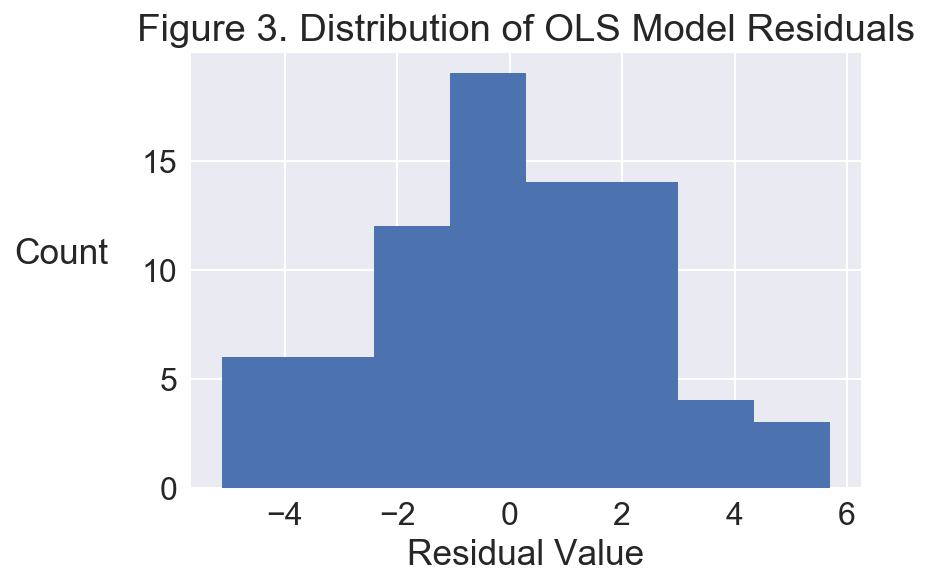

In [46]:
resids = statsmodels.regression.linear_model.RegressionResults.resid(model)

hist2 = plt.hist(resids, bins='auto') # check for variable normality in weight loss dependent variable. 
#Data looks normally distributed.
plt.title("Figure 3. Distribution of OLS Model Residuals")
plt.xlabel("Residual Values")
plt.ylabel("Count", rotation = 0, labelpad = 40)
plt.show()

In [106]:
table = sm.stats.anova_lm(model, typ=2) # Type 2 ANOVA DataFrame
print(table) 
# In a one-way ANOVA the null hypothesis is that the means of the Diet types are equal. We can reject that hypothesis
# because P < 0.05 

              sum_sq    df         F    PR(>F)
Diet       71.093689   2.0  6.197447  0.003229
Residual  430.179259  75.0       NaN       NaN


NameError: name 'RegressionResults' is not defined

array([3.02592593, 3.02592593, 3.3       , 3.3       , 3.3       ,
       3.3       , 3.3       , 3.3       , 3.3       , 3.3       ,
       3.3       , 3.3       , 3.3       , 3.3       , 3.3       ,
       3.3       , 3.02592593, 3.02592593, 3.02592593, 3.02592593,
       3.02592593, 3.02592593, 3.02592593, 3.02592593, 3.02592593,
       3.02592593, 3.02592593, 3.02592593, 3.02592593, 3.02592593,
       5.14814815, 5.14814815, 5.14814815, 5.14814815, 5.14814815,
       5.14814815, 5.14814815, 5.14814815, 5.14814815, 5.14814815,
       5.14814815, 5.14814815, 5.14814815, 5.14814815, 5.14814815,
       3.3       , 3.3       , 3.3       , 3.3       , 3.3       ,
       3.3       , 3.3       , 3.3       , 3.3       , 3.3       ,
       3.02592593, 3.02592593, 3.02592593, 3.02592593, 3.02592593,
       3.02592593, 3.02592593, 3.02592593, 3.02592593, 3.02592593,
       3.02592593, 5.14814815, 5.14814815, 5.14814815, 5.14814815,
       5.14814815, 5.14814815, 5.14814815, 5.14814815, 5.14814